In [16]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='all',
                          categories=['rec.autos', 'rec.sport.hockey'],
                          remove=('headers', 'footers', 'quotes'))

df = pd.DataFrame({'text': data.data, 'target': data.target})
df.head()

,text,target
0,"\n\nI'm totally p*-o'd, too! Vancouver-Winnip...",1
1,"First off, the correct spelling of Nissan's lu...",0
2,\nYou moved from Alabama to California? My sy...,0
3,"\n\nFor an all out sports car, I'd go for the ...",0
4,Just heard on the news that Mike Keenan former...,1


In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [19]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.9798994974874372
Precision: 0.9949748743718593
Recall: 0.9658536585365853


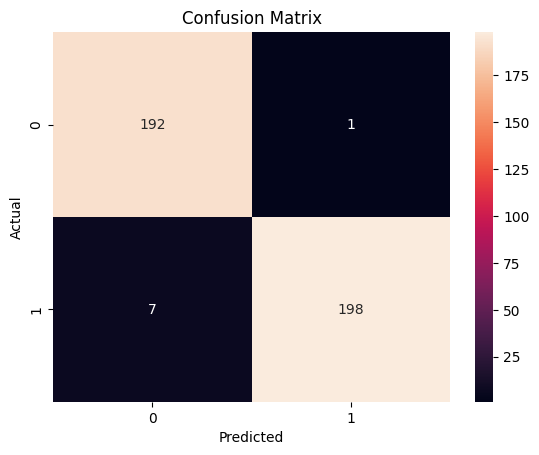

In [22]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

This project implements text classification using TF-IDF vectorization and Logistic Regression.
The model achieved strong accuracy in distinguishing between two categories of movie-related discussions.
This demonstrates how traditional machine learning models can effectively handle text-based datasets.